# Analyse Gemiddeld 4

Wordt er in de eerste helft significant meer of minder gescoord dan in de tweede helft?

Bereken over alle seizoenen heen het totaal aantal goals in de eerste helft en in de tweede helft. 

Hou waar mogelijk géén rekening met goals in de toegevoegde tijd omdat dit een vertekend beeld zou kunnen geven.


In [2]:
# Importing the necessary packages
import pandas as pd
from scipy.stats import chisquare 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Laad de data
doelpunten_data = pd.read_csv(r"C:\Users\Robbe\Documents\School_jaar_2\sem2\DEP\doelpunten.csv", sep=";")

Chi-square value: 763.4390625
P-value: 4.800647314194788e-168


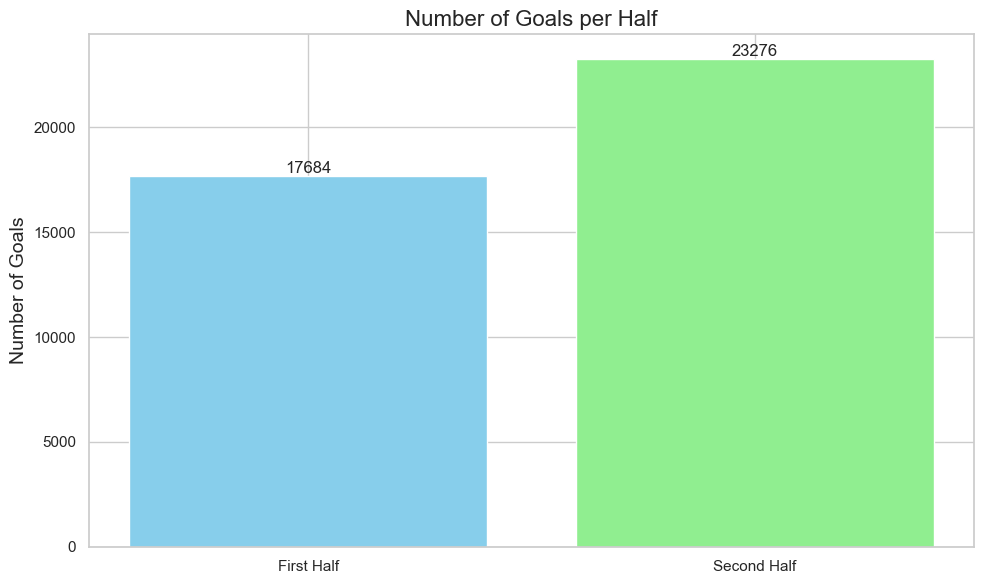

Conclusie: Significant verschil in doelpuntenverdeling tussen de helften (verwerp H0).


In [8]:
# Doelpunten identificeren in de eerste en tweede helft
doelpunten_1e_helft = doelpunten_data[doelpunten_data['MinDoelpunt'] <= 45]
doelpunten_2e_helft = doelpunten_data.query('45 < MinDoelpunt <= 90')

# Totaal aantal doelpunten per helft berekenen
totals = [len(doelpunten_1e_helft), len(doelpunten_2e_helft)]

# Verwachte doelpunten aannemende een gelijke verdeling
expected_goals = [sum(totals) / 2] * 2

# Chi-kwadraat Goedheid van Fit test uitvoeren
chi2_stat, p_value = chisquare(f_obs=totals, f_exp=expected_goals)

# Resultaten uitvoeren
print(f"Chi-square value: {chi2_stat}")
print(f"P-value: {p_value}")

# Plot instellingen met seaborn
sns.set(style="whitegrid")
labels = ['First Half', 'Second Half']
colors = ['skyblue', 'lightgreen']

# Staafdiagram maken
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, totals, color=colors)
plt.title('Number of Goals per Half', fontsize=16)
plt.ylabel('Number of Goals', fontsize=14)

# Annotate bars with goal counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, int(height), va='bottom', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Conclusie op basis van de chi-kwadraat tes
if p_value < 0.05:
    print("Conclusie: Significant verschil in doelpuntenverdeling tussen de helften (verwerp H0).")
else:
    print("Conclusie: Geen significant verschil in doelpuntenverdeling tussen de helften (H0 niet verwerpen).")